# * -----------------Feature Seletions-------------------------- *

# purose of feaure selection

1. removing irrelavant feature
2. to increase  accuracy
3. prediction performance tunning
4. too reduce dimension 
5. trainning time reduce
6. for better performance

#################################################################################################################

In [1]:
# Three different type of   -----

In [2]:
import pandas as pd 
import numpy as np

In [3]:
df=pd.read_csv(r'C:\Users\admin\Downloads\train.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# chi_square-test technique For feature Selection

In [6]:
 df.dropna(inplace=True)     # for drop null values

In [7]:
y=df['Survived']           # a column of name survived assign to y

In [8]:
df['gen']=df['Sex'].map({'female':1,'male':0})   # categorical data converted into  numerical data

In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gen
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,1
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,0
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1


In [10]:
Embarked1=pd.get_dummies(df['Embarked'],drop_first=True)     # encoding categoric to numerical by dummy encoder

In [11]:
Embarked1

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1
...,...,...
871,0,1
872,0,1
879,0,0
887,0,1


In [12]:
df2=pd.concat([df,Embarked1],axis=1)   # added encoded column with main df

In [13]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gen,Q,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,1,0,1
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,0,0,1
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,1,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,1


In [14]:
df_final=df2[['gen','Q',"S"]]

In [15]:
X=df_final

In [16]:
X           # consider as independant feature

,gen,Q,S
1,1,0,0
3,1,0,1
6,0,0,1
10,1,0,1
11,1,0,1
...,...,...,...
871,1,0,1
872,0,0,1
879,1,0,0
887,1,0,1


In [17]:
y                    # consider as dependant feature

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

In [18]:
from sklearn.feature_selection import chi2       # import chi2 

In [19]:
chi2_square_value,p_val = chi2(X,y)          # apply chi2 the we will get chi2_square_value and p_value

In [20]:
chi2_square_value

array([26.92954545,  0.26890244,  0.61568545])

In [21]:
p_val

array([2.11008452e-07, 6.04068977e-01, 4.32655133e-01])

In [22]:
p_val=np.around(p_val,5)      

In [23]:
p_val

array([0.     , 0.60407, 0.43266])

In [24]:
chi_sqa=pd.DataFrame({'features':X.columns,'chi_score':chi2_square_value,'p_value':p_val})

In [25]:
chi_sqa.sort_values('p_value')

,features,chi_score,p_value
0,gen,26.929545,0.00000
2,S,0.615685,0.43266
1,Q,0.268902,0.60407


In [26]:
# if p_val > 0.05 then two variaable are independant
# if p_val <= 0.05 then two variaable are dependant

In [27]:
#####################################

# Information Gain Technique

In [28]:
from sklearn.feature_selection import mutual_info_classif

In [29]:
# mutual_info_classif ---> for categorical   and mutual_info_regrassion -----> for continuous

In [30]:
info=mutual_info_classif(X,y)
#info1=mutual_info_regrassion(x['age',y])

In [31]:
info

array([0.12958968, 0.        , 0.06357553])

In [32]:
a1=pd.Series(info)

In [33]:
a1

0    0.129590
1    0.000000
2    0.063576
dtype: float64

In [34]:
a1.index=X.columns

In [35]:
a1

gen    0.129590
Q      0.000000
S      0.063576
dtype: float64

In [36]:
a2=a1.sort_values(ascending=True)

In [39]:
a2

Q      0.000000
S      0.063576
gen    0.129590
dtype: float64

<Axes: >

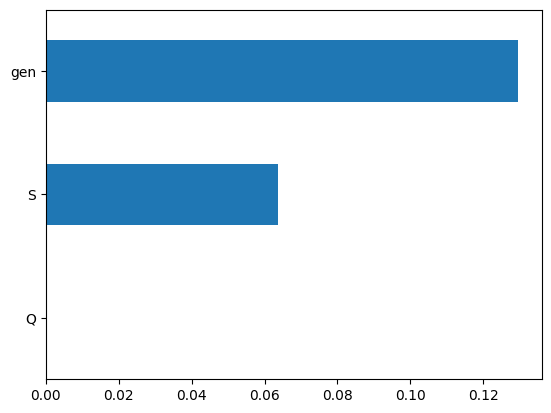

In [40]:
a2.plot(kind='barh')

In [41]:
######################################

# co-relation technique  ----> it is used for both will continue

In [42]:
# heat map   ---> co-relation

In [43]:
###############################

# Missing value ratio Technique

In [44]:
df = pd.read_csv(r'C:\Users\admin\Downloads\train.csv')

In [45]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [46]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
df.shape[0]

891

In [48]:
a1=(df.isna().sum()/df.shape[0])*100

In [49]:
(177/891)*100

19.865319865319865

In [50]:
a1

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [51]:
a1.sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [52]:
###############################

# Fisher score Technique

In [ ]:
!pip install skfeature-chappers

In [ ]:
from skfeature.function.similarity_based import fisher_score    

In [ ]:
X.values

In [ ]:
a= fisher_score.fisher_score(X.values,y)

In [ ]:
a

In [ ]:
b=pd.Series(a)

In [ ]:
b

In [ ]:
b.index=X.columns

In [ ]:
b

<Axes: >

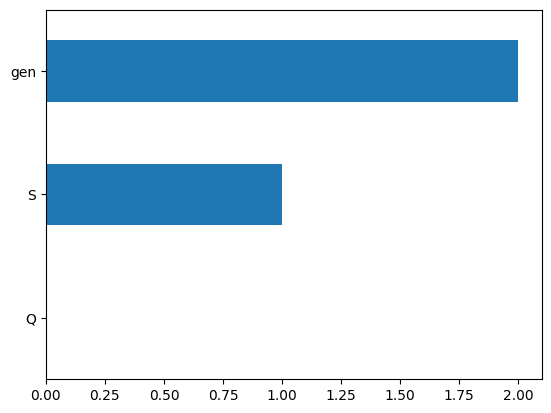

In [116]:


b.sort_values(ascending=True).plot(kind='barh')

In [ ]:
############################# END #############################################################

In [1]:
cor=df.corr()

NameError: name 'df' is not defined